## Wrangled data analysis and visualization

### Insight 1. Rating characteristics

 - As mentioned in the project detail section that WeRateDog has a unique rating system. I analyzed how people rate with "rating_numerator/rating_denominator" as a metrix.
 - Although most ratings are around one, either slightly hight or lower, some have really large numerators. I eliminated outliers which are more than 1.5 IQR above 75% quantile and then calculated the ratio of rating higher than one and not higher than one.
 - The result shows 59.6% of ratings are greater than and 40.3% of ratings are equal or less than one. Obviously around 60% of people enjoyed making fun of this rating system that doesn't make too muchc sense.
 - If I count in those outliers above the high limit, the ratio of greater than one would be even higher.

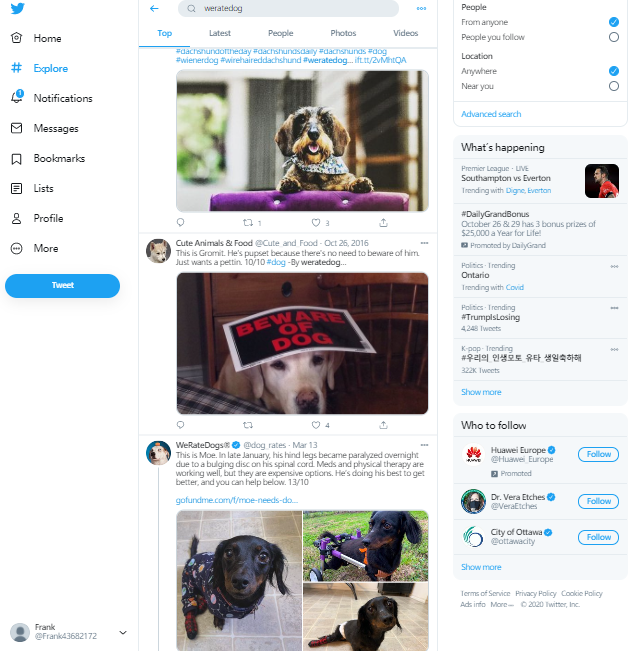

### Visualization 

 - People who reply to the tweets would probably give the tweet a favorite, they should be positively related in theory.
 - I plotted a scatterplot to show the relationship of these two variables. A hue of dog_stage is also added to see if there is anything interesting. Perhaps people tend to like dogs in a younger stage(my guess).

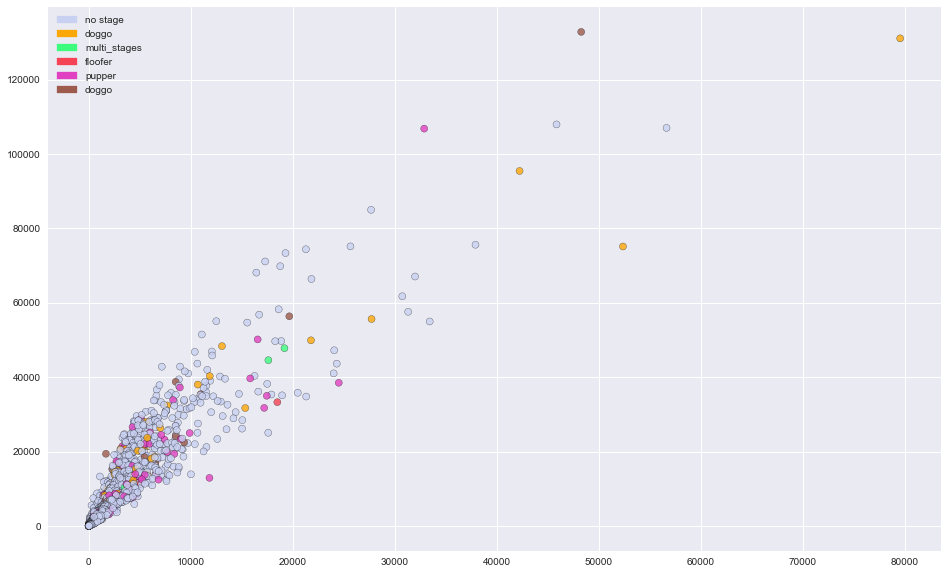

 - As expected, when a post has more retweets, it tend to have more favorites which shows they are linearly corelated. But since data points below 10000 retweets and 40000 favorites are really clustered and hard to visualize, I zoomed in to have a clearer look at how dog stages are distributed.

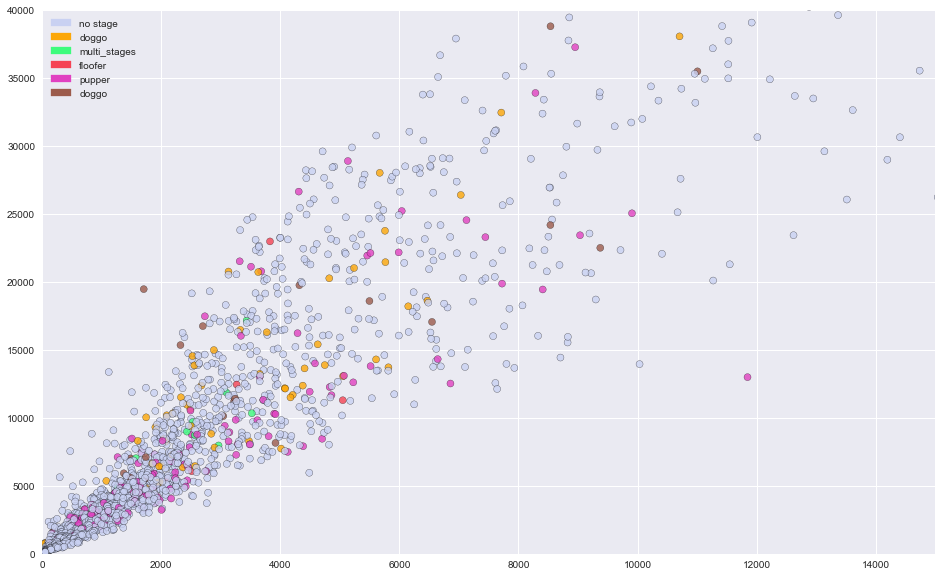

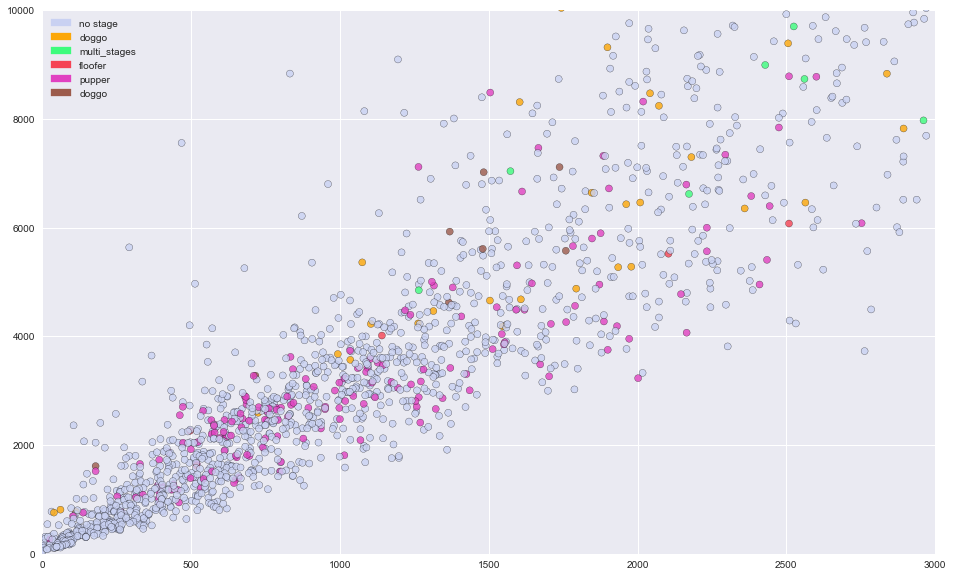

 - When taken closer, the purple points(pupper) seems to cluster more at left lower part of the graph compared to the orange points(doggo).
 - People probably have more consistent preference toward pupper and pretty wide range of preference about doggo judging from the favorites and retweets counts.
 - Other dog stage points are too few and are unable to show any patterns.

### Insight 2. The relationship between retweet, favorites, dog_stage and the rating of the dog image

 - I used retweets, favorites, and dog stage as features, rating_numerator/rating_denominator as target and tried to find how these features are related to the target.
 - By a using a multilinear model, the results show that there are no feature has a p value lower than 0.05. However, I have tested previously that retweets and favorites are highly correlated. Therefore, I calculated the variance inflation factor. No column has VIF higher than 10, but favorites and retweets column do have VIF more than 5.
 - After dropping retweets column and re-fit the model,it still doesn't work, no feature can really predict ratings.
 - Then I tried to remove outliers in rating_numerator/rating_denominator matrix and fit the model again. This time, pupper, doggo, and favorites have p values less than 0.05.
 - In the model, R-squared is still very low of only 0.156 meaning less than one fifth of the data points can be explained by the linear model.
 - Not ideal, though, it shows pupper, doggo, and favorites are related and have the ability to predict dog rating given that some of the outliers are removed.

### Insight 3. favorites counts in different dog predition group

 - I took a look at a few rows which are predicted not a dog. It turned out they are still dog photos, though, these dogs appear with other object, for example, a car. That is why these photos are predicted non-dog. 
 - I assume people may like photos with dogs being the major part. So I compared mean favorites counts between different prediction groups.
 - Among each group(using p1/p2/p3 model respectively), the actual mean favorites counts for True and False are pretty much the same while mean favorites for True are slightly more than False and this pattern is similar in all three models groups.

 - I group them into a multi-index table(3 layers: p1,p2,p3 respectively) and hope to find higher mean favorites counts among the group which all models predict to be dogs. But the truth is more inconsistent and doesn't seem to be related to what is predicted.
 - Generally, a trend that if more than two models have prediction "True" would have more favorites can be noticed, but with one exception. The group with only p2 model predicts to be True has the highest favorites. So I am curious if it is because more outliers are in this group.
 - Then I calculated numbers of outlier in each group and let them divided by the numbers of favorites in each group to get the ratio of outliers in these 8 groups. The results reveal the p1:False/p2:True/p3:False group has nearly 2 times more outliers than other 7 groups which match my assumption.